# Demographic Data Analyzer FCC project 

In this project demographic data is analyzed using pandas. A  dataset of demographic data that was extracted from the 1994 Census database is given. Here is a sample of what the data looks like:
`adult.data.csv`

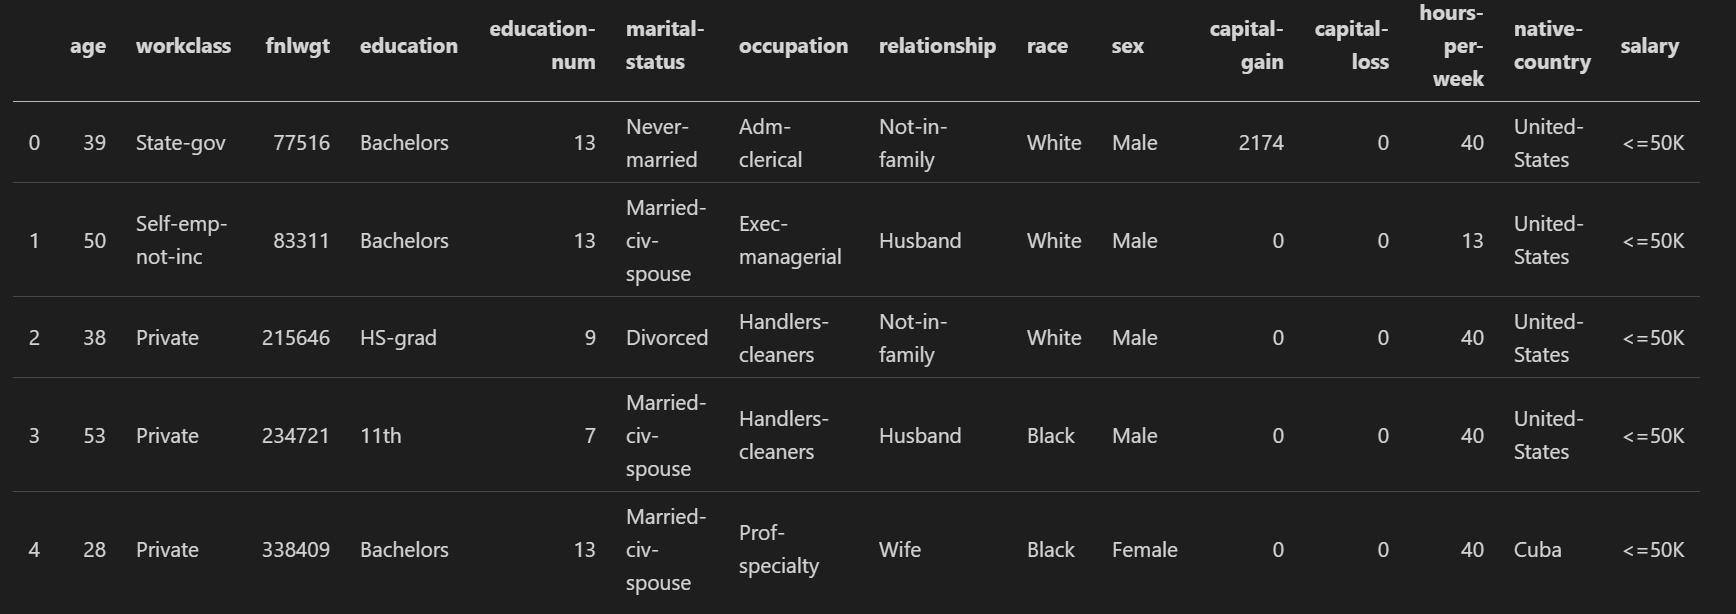

 ### In this project the following questions are answered:
1. How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index - completed 
2. labels. (race column) - completed 
3. What is the average age of men?  - completed 
4. What is the percentage of people who have a Bachelor's degree?  - completed 
5. What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?  - completed 
6. What percentage of people without advanced education make more than 50K?  - completed 
7. What is the minimum number of hours a person works per week?  - completed
8. What percentage of the people who work the minimum number of hours per week have a salary of more than 50K? - completed 
9. What country has the highest percentage of people that earn >50K and what is that percentage? - completed
10. Identify the most popular occupation for those who earn >50K in India.

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Question 1.
df = pd.read_csv('adult.data.csv')

In [4]:
#Question 2.
race_count = sorted(df.groupby(['race']).size().tolist(),reverse=True) 

In [5]:
#Question 3.
average_age_men = round(np.mean(df.loc[df['sex']=='Male','age'].tolist()),1)

In [6]:
#Question 4.
percentage_bachelors = round((len(df[df['education']=='Bachelors'])/len(df))*100,1)

In [7]:
#Question 5.
higher_education_rich = round((len(df.loc[((df['education']=='Bachelors')|(df['education']=='Masters')|(df['education']=='Doctorate')) & (df['salary']=='>50K')])/len(df.loc[(df['education']=='Bachelors')|(df['education']=='Masters')|(df['education']=='Doctorate')]))*100,1)

In [18]:
#Question 6.
lower_education = len(df.loc[~((df['education']=='Bachelors')|(df['education']=='Masters')|(df['education']=='Doctorate'))])
lower_education_rich = int(round((len(df.loc[~((df['education']=='Bachelors')|(df['education']=='Masters')|(df['education']=='Doctorate'))&(df['salary']==">50K")])/lower_education)*100,1))

In [12]:
#Question 7.
min_work_hours =min(df['hours-per-week'])


In [10]:
#Question 8.
rich_percentage = (len(df.loc[(df['hours-per-week']==min_work_hours) & (df['salary']==">50K")])/len(df[df['hours-per-week']==min_work_hours]))*100

In [14]:
#Question 9.
rich_populations = []
for i in df['native-country'].unique().tolist():
    rich_populations.append(round(len(df.loc[(df['native-country']==i)&(df['salary']==">50K")])/len(df[df['native-country']==i])*100,1))
highest_earning_country_percentage = max(rich_populations)
highest_earning_country = df['native-country'].unique().tolist()[rich_populations.index(max(rich_populations))]    

In [16]:
#Question 10.
occ_count =df.loc[(df['native-country']=='India') & (df['salary']==">50K")].groupby('occupation').size().tolist()
top_IN_occupation = sorted(df.loc[(df['native-country']=='India') & (df['salary']==">50K")].occupation.unique().tolist())[occ_count.index(max(occ_count))]

### Results recieved from the question codes.

In [19]:
print("Number of each race:\n", race_count) 
print("Average age of men:", average_age_men)
print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")
print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")
print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")
print(f"Min work time: {min_work_hours} hours/week")
print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")
print("Country with highest percentage of rich:", highest_earning_country)
print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")
print("Top occupations in India:", top_IN_occupation)

Number of each race:
 [27816, 3124, 1039, 311, 271]
Average age of men: 39.4
Percentage with Bachelors degrees: 16.4%
Percentage with higher education that earn >50K: 46.5%
Percentage without higher education that earn >50K: 17%
Min work time: 1 hours/week
Percentage of rich among those who work fewest hours: 10.0%
Country with highest percentage of rich: Iran
Highest percentage of rich people in country: 41.9%
Top occupations in India: Prof-specialty
